<a href="https://colab.research.google.com/github/PHYS486-S22/PHYS486-S22/blob/main/Boltzmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
%matplotlib inline
import numpy as np
from numpy.random import rand, randint
import matplotlib.pyplot as plt

In [7]:
def calcEnergy(n):
    
  #simple hydrogen atom energy level
  energy = -13.6 / (n*n) # in eV

  return energy    

In [6]:
print(calcEnergy(20))

-0.034


In [16]:
def probEnergy(n,T):

  #calculate the energy of the state
  energy = calcEnergy(n)

  #calculate kT
  k = 8.617342315e-5 #eV/Kelvin
  kT = k*T

  #calculate probability (unnormalized!)
  prob = np.exp(-1.*energy/kT)

  return prob

In [21]:
print(probEnergy(1,10))

inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [24]:
def relativeProb(n1,n2,T):

  #calculate the energies of the states n1 & n2
  n1energy = calcEnergy(n1)
  n2energy = calcEnergy(n2)

  #calculate kT
  k = 8.617342315e-5 #eV/Kelvin
  kT = k*T

  #calculate relative probabilities of states n1 and n2
  prob_n2_over_n1 = np.exp(-1.*(n2energy - n1energy)/kT)

  return prob_n2_over_n1

In [31]:
print(calcEnergy(1))
print(calcEnergy(2))
print(relativeProb(1,2,100000))

-13.6
-3.4
0.3061562749581908


In [36]:
from IPython.core.display import JSON
for i in range(100):
  totalProb = 0.
  for j in range(i):
    totalProb = totalProb + relativeProb(1,j+2,30000.)
  print(i, totalProb)

0 0.0
1 0.019340923943570672
2 0.0286553946936524
3 0.03586807231565375
4 0.04227560511413174
5 0.04828411476290026
6 0.05406413589766449
7 0.05970052994357325
8 0.06524052136830502
9 0.0707125697247517
10 0.07613488480384577
11 0.08151967650016953
12 0.08687544594911338
13 0.09220829847255091
14 0.09752273427524169
15 0.10282214467858643
16 0.10810913459683542
17 0.1133857384496106
18 0.11865356851726117
19 0.12391391921545368
20 0.12916784187027516
21 0.1344161993046369
22 0.13965970632919086
23 0.14489896021380935
24 0.15013446392066102
25 0.15536664403052228
26 0.1605958647259473
27 0.16582243880830458
28 0.17104663645826435
29 0.17626869226158162
30 0.18148881088841085
31 0.1867071717180954
32 0.1919239326311602
33 0.19713923313847506
34 0.20235319697901238
35 0.20756593428864575
36 0.21277754342045768
37 0.2179881124802151
38 0.22319772062771318
39 0.22840643918462497
40 0.23361433258162545
41 0.23882145917136272
42 0.24402787192894318
43 0.24923361905768587
44 0.2544387445147685

In [39]:
def HydrogenWalk(steps, ceiling, temp):

  #set up an array to save our ns in each step.
  n = np.zeros(steps)

  #set up the atom in the ground state
  n[0] = 1

  for i in range(steps-1):
    n[i+1] = HydrogenStep(n[i], ceiling, temp)

  return n

In [40]:
def HydrogenStep(n, ceiling, temp):

  #randomly select a level to check if the atom will transition into it.
  next_level = randint(1,ceiling)

  #calculate the probability of making this switch
  switch_chance = relativeProb(n, next_level, temp)

  #randomly select a floating point value between 0 and 1
  check = rand()

  #decide if we make the switch
  if (check < switch_chance):
    end = next_level
  else:
    end = n

  return end

In [83]:
hydrogenCold = HydrogenWalk(100000, 100, 10.)
hydrogenHot = HydrogenWalk(100000, 100, 100000.)

In [84]:
print(np.mean(hydrogenCold), np.mean(hydrogenHot))

1.0 47.71318


In [85]:
print(hydrogenCold[0:100])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [86]:
print(hydrogenHot[0:100])

[ 1.  1.  1.  1. 45. 93. 38. 88. 45. 67. 88.  8. 91.  8. 69. 30. 19. 60.
 16. 25. 89. 96. 47. 62. 31. 61.  4. 64. 82. 67. 81. 36. 95. 15. 21. 74.
 74. 10. 13. 42. 17. 41. 11. 41. 42.  3. 55. 62. 34. 73. 57. 11. 52. 68.
 37. 50. 50. 76. 72. 77. 12. 76. 25. 52. 52. 59.  9. 73. 61. 33. 14. 94.
 93. 74. 51. 45. 17. 92. 88. 68. 20.  7. 61. 36. 75. 60. 51. 97. 79. 32.
 10. 28. 70. 42. 61. 42. 21. 70. 35.  4.]


(array([     0.,      0.,      0.,      0.,      0., 100000.,      0.,
             0.,      0.,      0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

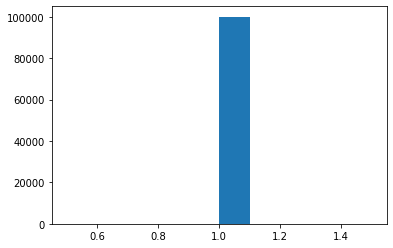

In [87]:
plt.hist(hydrogenCold)

(array([14478.,  9483.,  9668.,  9609.,  8640.,  9482.,  9720.,  9631.,
         9700.,  9589.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

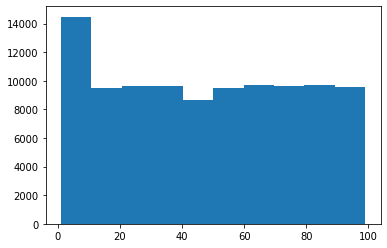

In [88]:
plt.hist(hydrogenHot)